## 4.1 EDA and data preprocessing 	(5b) 

In [64]:
# Ako prve opiseme tento dataset. Dataset obsahuje snimky pluc. Tieto snimky su roztriedene na zaklade chorob na 3 kategorie
# Plucia cloveka s Covid-19, Viral Pneumonia a normálne zdravé plucia.

# toto je opis z konkretnej stranky z kade boli data stianuté.

# Content
# It is a simple directory structure branched into test and train and further branched into the respective 3 classes which contains the images.


# About this directory
# It contains around 137 cleaned images of COVID-19 and 317 in total 
# containing Viral Pneumonia and Normal Chest X-Rays structured into the test and train directories.

In [65]:
# importy
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from pathlib import Path
folder = Path("./Covid19-dataset")


classes = ["Covid", "Viral Pneumonia", "Normal"]
train_dir_path = folder / "train"
test_dir_path = folder / "test"

- (A-4b)	EDA a data preprocessing pre Vami vybrané charakteristiky z datasetu 

In [66]:
# Najprv preskumanim struktury datasetu

# vypis velkosti konkretnych dat pre kazdu classu
for cls in classes:
    print(f"{cls} - Train Images: {len(os.listdir(train_dir_path/cls))}")
    print(f"{cls} - Test Images: {len(os.listdir(test_dir_path/cls))}")    

Covid - Train Images: 111
Covid - Test Images: 26
Viral Pneumonia - Train Images: 70
Viral Pneumonia - Test Images: 20
Normal - Train Images: 70
Normal - Test Images: 20


In [67]:
# Dalej si vypiseme a zobrazime graficky rozsah
# rozlisenia (pocet pixelov) pre classy
from PIL import Image

def visualize_resolutions(class_name: str, data_path: str):
    class_path = os.path.join(data_path, class_name)
    images_lst = os.listdir(class_path)
    
    resolutions = []

    # Iterate through images and collect resolutions
    for image_name in images_lst:
        image_path = os.path.join(class_path, image_name)
        try:
            # Load the image
            image = Image.open(image_path)
            # Get the resolution
            width, height = image.size
            resolutions.append((width, height))
        except Exception as e:
            print(f"Error processing {image_name}: {e}")
    
    # Calculate resolution ranges
    widths = [res[0] for res in resolutions]
    heights = [res[1] for res in resolutions]
    
    width_range = (min(widths), max(widths))
    height_range = (min(heights), max(heights))
    
    print(f"Width range: {width_range}")
    print(f"Height range: {height_range}")
    
    # Visualize resolution distribution
    plt.figure(figsize=(10, 6))
    
    # Scatter plot for individual resolutions
    plt.scatter(widths, heights, alpha=0.7, label="Image Resolutions")
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.title(f"Resolution Distribution for {class_name}")
    plt.legend()
    plt.grid()
    plt.show()
    
    # Histogram of widths and heights
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(widths, bins=20, alpha=0.7, color='blue', label="Widths")
    plt.xlabel("Width")
    plt.ylabel("Frequency")
    plt.title("Width Distribution")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(heights, bins=20, alpha=0.7, color='green', label="Heights")
    plt.xlabel("Height")
    plt.ylabel("Frequency")
    plt.title("Height Distribution")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

Width range: (439, 4248)
Height range: (391, 4095)


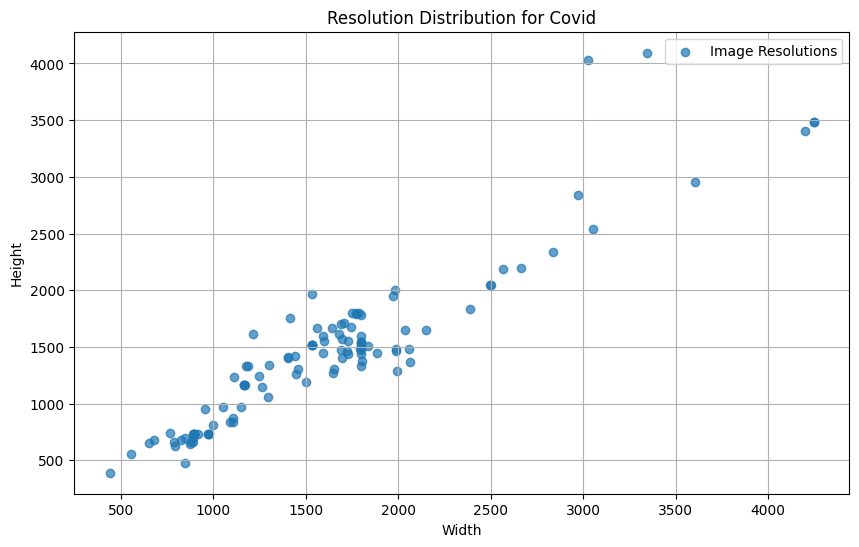

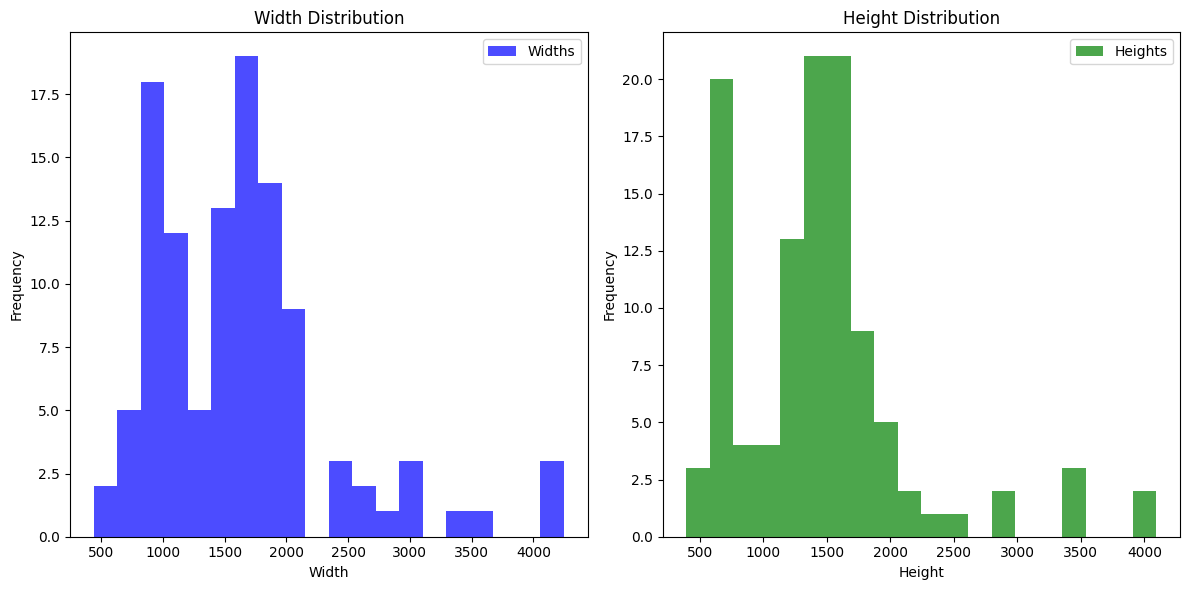

Width range: (1056, 2000)
Height range: (744, 1456)


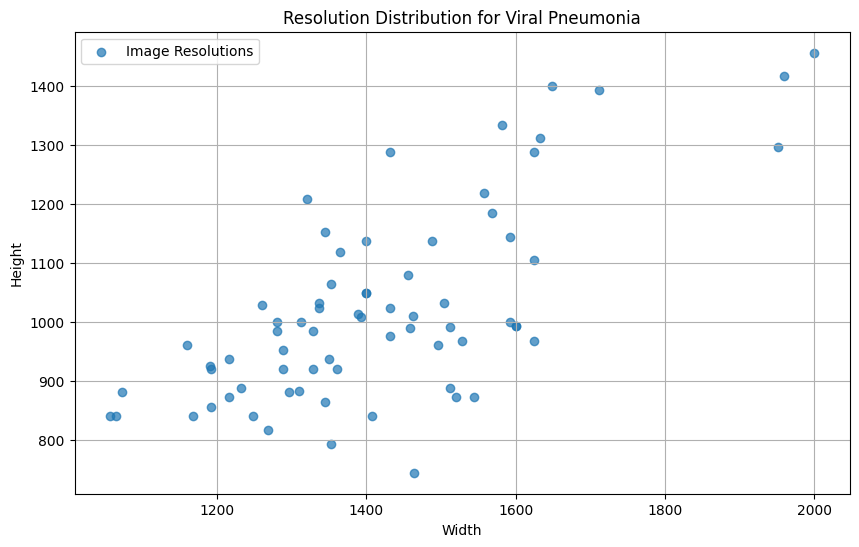

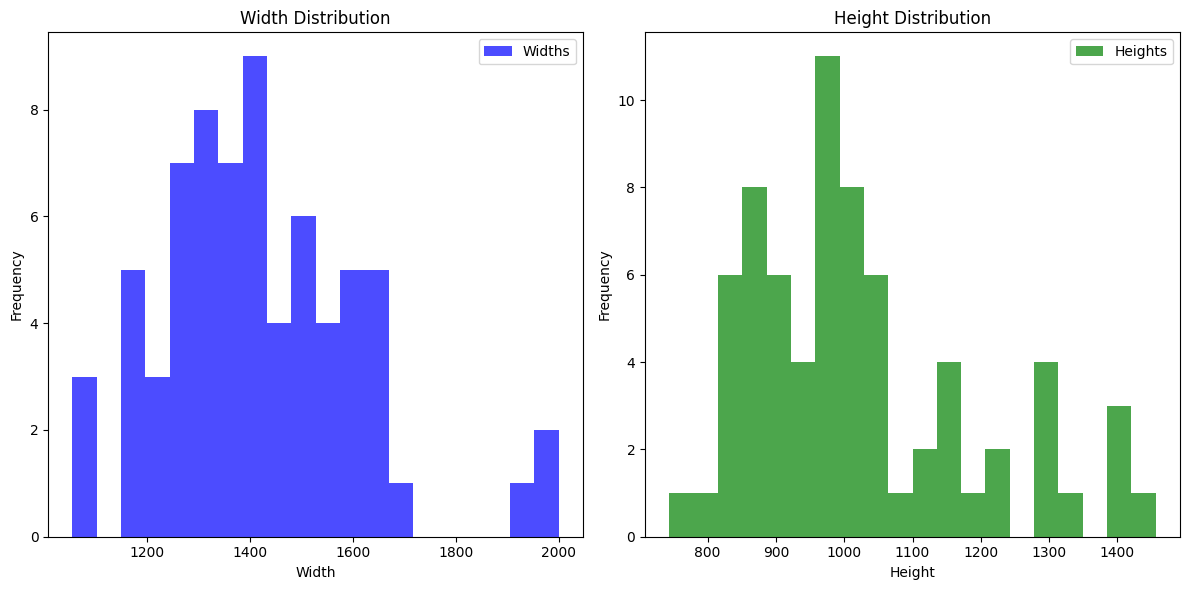

Width range: (1534, 2752)
Height range: (1063, 2713)


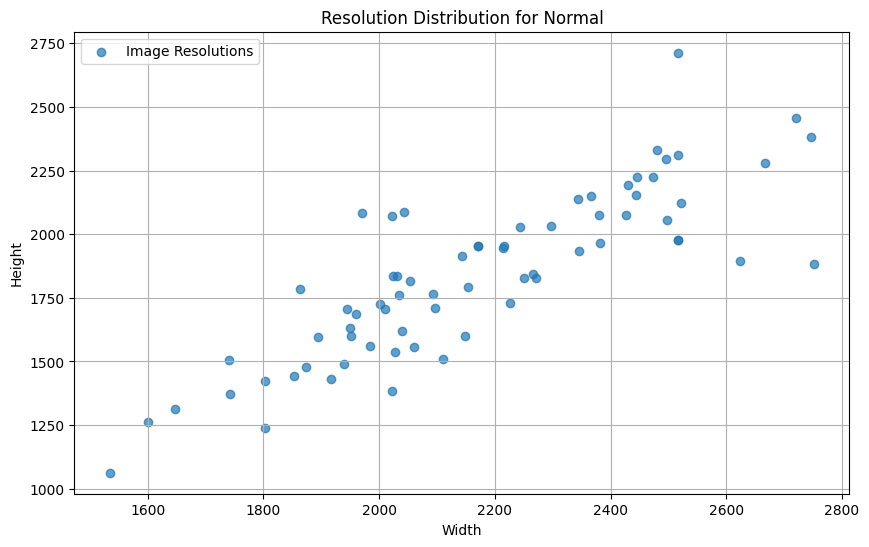

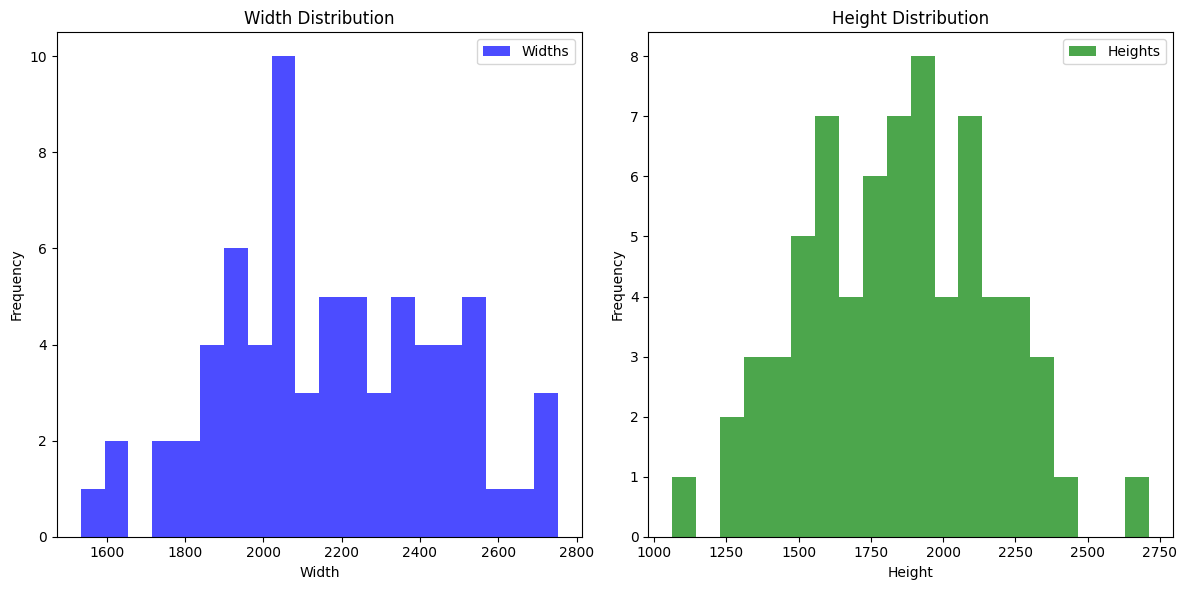

In [68]:
for cls in classes:
    visualize_resolutions(cls, train_dir_path)

In [69]:
from random import sample
# definujeme si funkciu ktora vizualizuje nahodne samples obrazkov
# zo zadanej classy
def visualize_samples(class_name: str, data_path: str, sample_size: int):
    class_path = data_path/class_name
    images_lst = os.listdir(class_path)
    images_sample = sample(images_lst, sample_size)
    plt.figure(figsize=(10, sample_size))
    for i, image_name in enumerate(images_sample):
        img_path = class_path/image_name
        img_arr = plt.imread(img_path)
        plt.subplot(1, sample_size, i + 1)
        plt.imshow(img_arr, cmap="gray")
        plt.title(class_name + " " + image_name)
        plt.axis("off")
    plt.show()

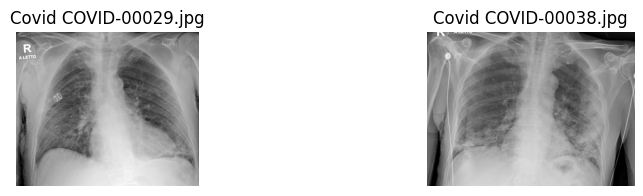

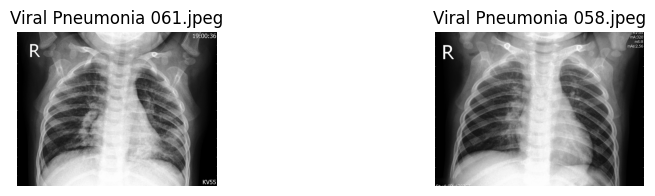

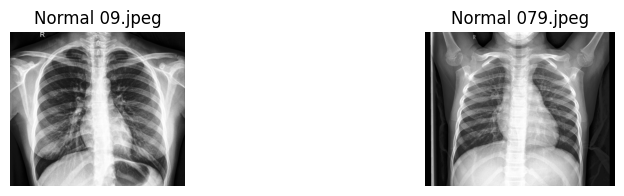

In [70]:
for cls in classes:
    visualize_samples(cls, train_dir_path, 2)

In [71]:
def is_grayscale(image_path):
    # Load the image
    image = Image.open(image_path)
    
    # Convert to numpy array
    img_array = np.array(image)
    
    # Check if it's an RGB image
    if image.mode == "RGB":
        # Compare all three channels (R, G, B) for equality
        if np.all(img_array[:, :, 0] == img_array[:, :, 1]) and np.all(img_array[:, :, 1] == img_array[:, :, 2]):
            return True
    return False

In [72]:
# na sample snimkoch mozme vidiet ze su obrazky 
# v grayscale, chceme sa ale presvedcit ci su 
# takehoto typu vsetky obrazky v datasete, 
# preto prejdeme celym datasetom a ziskame "rgb" mode
# alebo "L" mode ktore oznacuje grayscale

def print_color_modes(class_name: str, data_path:str):
    class_path = data_path/class_name
    images_lst = os.listdir(class_path)
    color_modes = []
    for image_name in images_lst:
        try:
            image = Image.open(class_path/image_name)
            if is_grayscale(class_path/image_name):
                color_modes.append("L")
            else:
                color_modes.append(image.mode)
        except Exception as e:
            print(f"Error processing {image_name}: {e}")

    mode_counts = Counter(color_modes)
    print(f"Color modes in {class_name} class")
    for mode, count in mode_counts.items():
        print(f"{mode}: {count}")
    print()

In [73]:
for cls in classes:
    print_color_modes(cls, train_dir_path)


Color modes in Covid class
L: 102
RGBA: 5
RGB: 4

Color modes in Viral Pneumonia class
L: 70

Color modes in Normal class
L: 70



In [74]:
# 1st output:
# Color modes in Covid class
# RGB: 69
# RGBA: 5
# L: 37

# Color modes in Viral Pneumonia class
# RGB: 70

# Color modes in Normal class
# RGB: 70

# mozme vidiet ze vacsia cast snimkov su ulozene v RGB mode
# presnejsie 209/251, predtym ako vsetky convertujeme na grayscale
# sa ujistime ze RGB hodnoty pri RGB zakodovanych obrazkoch
# su hodnoty, co by vypocedalo ze su grayscale, aj ked su v RGB mode

# pridame funkciu a upravime povodnu funkciu na detekciu modov

In [75]:
#2nd output:
# Color modes in Covid class
# L: 102
# RGBA: 5
# RGB: 4

# Color modes in Viral Pneumonia class
# L: 70

# Color modes in Normal class
# L: 70

In [76]:
# Z 2. iteracie vysledkov mozme vidiet ze vacsina obrazkov je grayscale
# a preto je bezpecne prehlasit ze mozme zmenit celemu datasetu mode na gray scale
# pre konzistenciu, alebo s nim narabat tak, ze su vsetky obrazky rovnakeho typu

In [77]:
# este skontrolujeme v akom formate su snimky ulozene

def print_image_formats(class_name: str, data_path:str):
    class_path = data_path/class_name
    images_lst: List[str] = os.listdir(class_path)
    formats = []
    for image_name in images_lst:
        
        formats.append(image_name.split(".")[-1])
    
    format_counts = Counter(formats)
    print(f"Image formats in {class_name} class")
    for img_format, count in format_counts.items():
        print(f"{img_format}: {count}")
    print()

In [78]:
for cls in classes:
    print_image_formats(cls, train_dir_path)

Image formats in Covid class
jpeg: 46
png: 8
jpg: 57

Image formats in Viral Pneumonia class
jpeg: 70

Image formats in Normal class
jpeg: 70



In [79]:
# mozme vidiet ze nemame konzistentne file formaty,
# co by nemuselo, ale mohlo v buducnosti vadit v nasom workflowe
# preto v jednej funkcii vsetky obrazky zmenine do graysclae modu "L"
# a taktiez ich convertujeme na konzistentny rovnaky
# file format


def convert_to_grayscale_and_save(source_folder, target_folder, target_format="JPEG"):

    os.makedirs(target_folder, exist_ok=True)
    
    for image_name in os.listdir(source_folder):
        try:
            # Define source and target paths
            image_path = source_folder / image_name
            new_name = os.path.splitext(image_name)[0] + ".jpg"
            target_path = target_folder / new_name
            
            # Open the image
            image = Image.open(image_path)
            
            # Convert to grayscale
            grayscale_image = image.convert("L")
            
            # Save in the target format
            grayscale_image.save(target_path, target_format)
            
        except Exception as e:
            print(f"Error processing {image_name}: {e}")

In [80]:
save_path_train = Path("./Covid_preprocess/train/")
for cls in classes:
    convert_to_grayscale_and_save(train_dir_path/cls, save_path_train/cls)


Error processing 07.jpeg: [Errno 22] Invalid argument: 'C:\\Users\\Asus\\iau_project\\Covid_preprocess\\train\\Viral Pneumonia\\07.jpg'


In [81]:
save_path_test = Path("./Covid_preprocess/test/")
for cls in classes:
    convert_to_grayscale_and_save(test_dir_path/cls, save_path_test/cls)


# Hlavne vystupy a pozorovania z EDA

1. Dataset ma 3 triedy snimkov pluc (Covid-19, Viral Pneumonia, Normal)
2. Konkrétne počty tried sú:
    1. 137 - Covid-19
    2. 317 - Pneumonia + Normal
    - Data sú už predom rozdelené na trénovacie (~79%) a testovacie ~(21%)
3. Pôvodné snimky boli vsetky už čiernobiele, všetky sme preiterovali a zmenili ich mode na "L" grayscale pre konzistentnosť ( Toto je už čast preprocesingu [hups?])
4. Snímky boli uložené v rôzných file formátoch, pre konzistentnosť sme ich všetky uložili do jednotného formátu .jpg
5. Na grafoch a vo výpisoch môžme vidieť aj diverzitu v rozlíšeniach jednotlivých skupín snímkov

## Časť preprocesingu

V následujúcej časti budeme vykonávať následujúce metódy preprocesingu. (na poradí datých techník záleží).
1. Grayscaling (táto časť bola už vykonaná v rámci EDA)
2. Redukcia Šumu - (Gaussian Blur alebo Median Filtering), zabráni zosilnenie šumu v procese ostrenia
3. Zaostrovanie - (Convolution filters for edge enhancement)
4. Resizing - vsetky snimky budeme skalovat do rovnakych rozmerov (224x224px) zachováva jednotnosť nižšie "rozšírených" obrázkov. 
5. Data Augmentation - obrazky budeme horizontalne otáčať, keďže vertikálne by nebolo vhodné keďže ide o ľudské plúca a výskit srdca na snímke by mohlo poškodiť/ovplyvniť trénovanie modelu
6. Binarizácia
7. Normalizacia pixelov - pre kazdu snimku normalizujeme pixely na hodnoty medzi [0,1] alebo [-1, 1]

Následujúce poradie by sme mohli ešte trocha zmeniť, ako napríklad performovať resizing ako prvý. Potom by sa ostatne techniky robili na značne menších rozmeroch a teda by sa čas vykonanie preprocessingu značne znížil, no kvalita niektorých procesov by sa mohla znížiť. V prvom pokuse necháme teda toto poradie a prípadne ho zmenime ak narazíme na problem s výpočtovým časom.

## 1. Grayscaling (Hotový v EDA časti)

## 2. Redukcia šumu

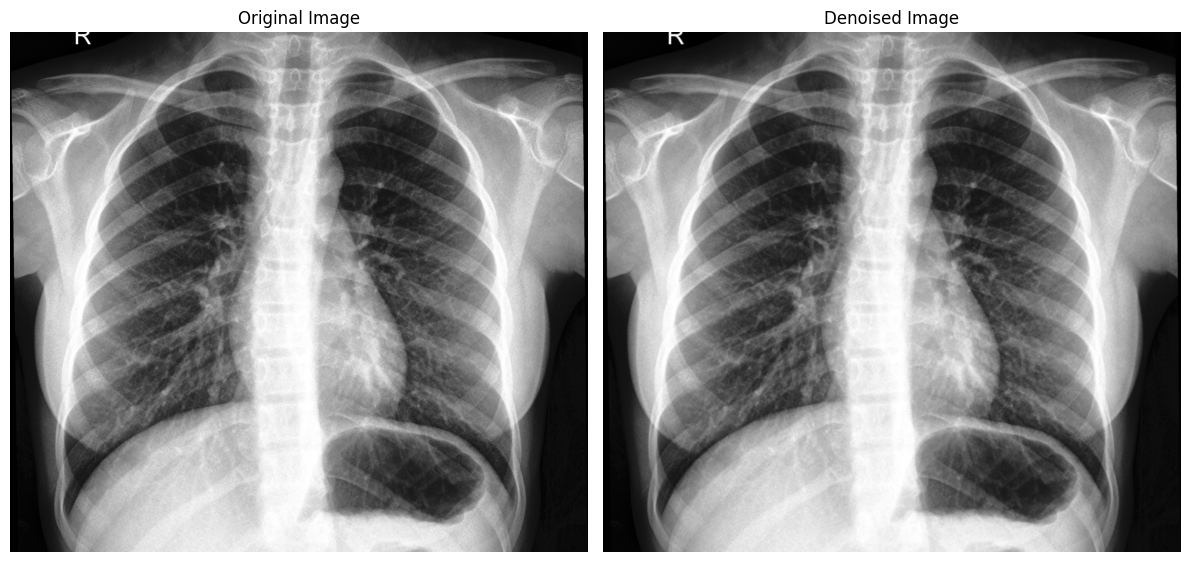

In [82]:
import cv2
import numpy as np

def reduce_noise(image):
    if isinstance(image, Image.Image):
        image = np.array(image)
    denoised_image = cv2.GaussianBlur(image, (5, 5), 0)
    return denoised_image

# Example before/after
normal_image_path = Path("Covid_preprocess/train/Normal/020.jpg")
original_image = Image.open(normal_image_path)

# BEFORE: Convert to numpy array for consistency
original_image_np = np.array(original_image)

# Apply noise reduction
denoised_image = reduce_noise(original_image)

# Plot side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image_np, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Denoised image
plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title("Denoised Image")
plt.axis('off')

plt.tight_layout()
plt.show()

## 3. Zaostrovanie

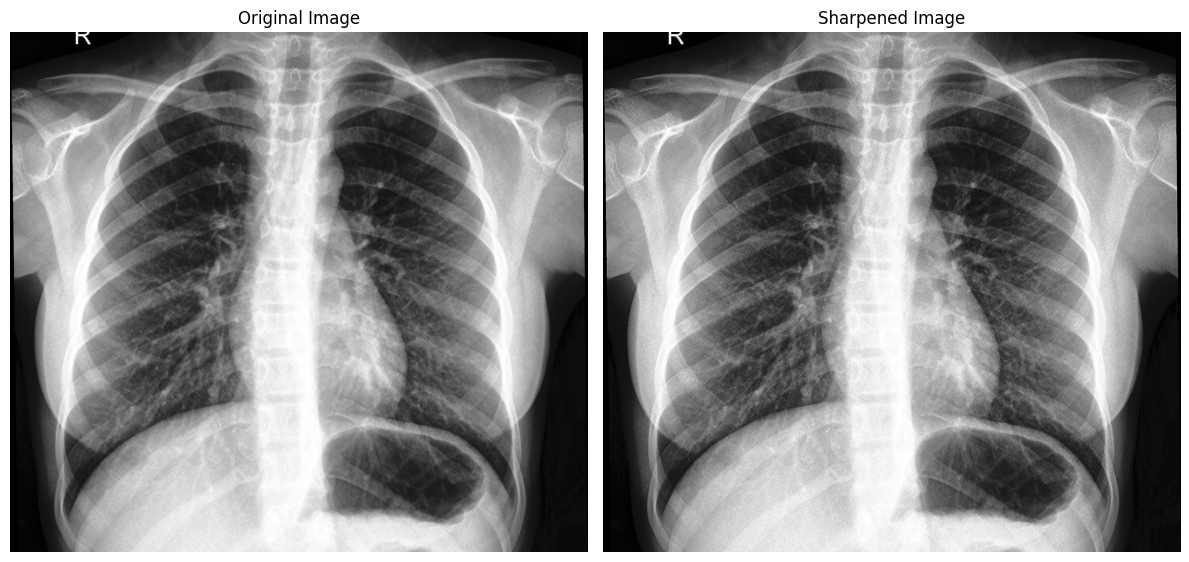

In [83]:
def sharpen_image(image):
    
    if isinstance(image, Image.Image):
        image = np.array(image)
    kernel = np.array([[0, -1, 0], 
                       [-1, 5, -1], 
                       [0, -1, 0]])
    sharpened_image = cv2.filter2D(image, -1, kernel)
    return sharpened_image

# Example before/after
sharpened_image = sharpen_image(original_image)

# Plot side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image_np, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Denoised image
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title("Sharpened Image")
plt.axis('off')

plt.tight_layout()
plt.show()

## 4. Resizing (224x224)

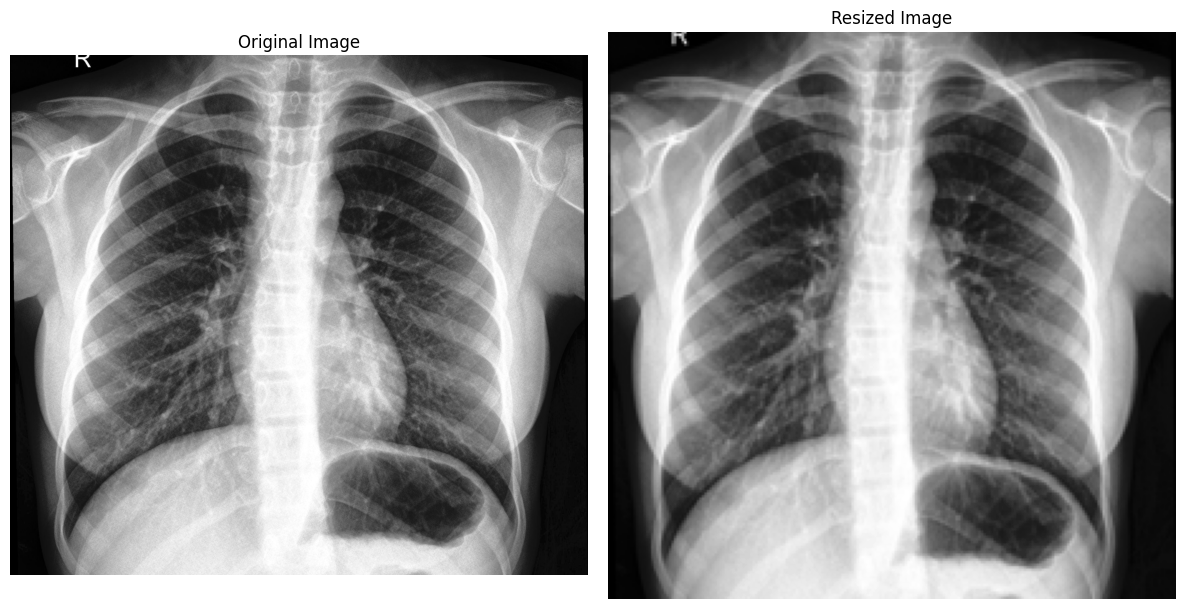

In [84]:
from PIL import Image

def resize_image(image, output_size=(224, 224)):
    return image.resize(output_size)

# Example before/after
original_image_np = np.array(original_image)

# Resize image
resized_image = resize_image(original_image)

# Plot side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image_np, cmap='gray' if original_image.mode == "L" else None)
plt.title("Original Image")
plt.axis('off')

# Resized image
plt.subplot(1, 2, 2)
plt.imshow(np.array(resized_image), cmap='gray' if resized_image.mode == "L" else None)
plt.title("Resized Image")
plt.axis('off')

plt.tight_layout()
plt.show()

## 5. Data Augmentation (horizontal flipping)

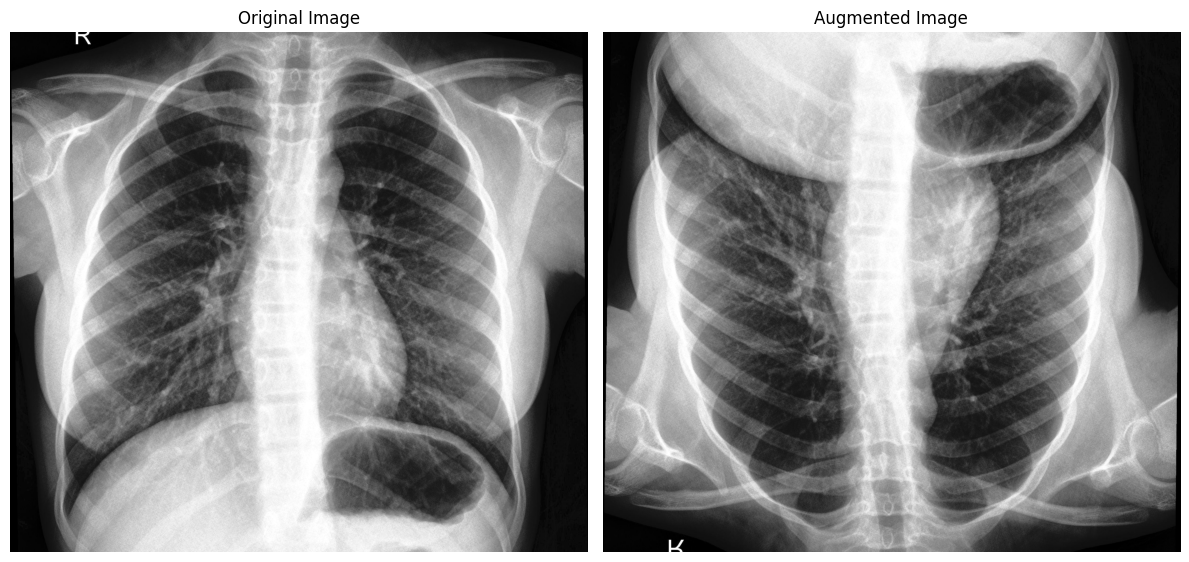

In [85]:
import random

def augment_image(image):
    if not isinstance(image, Image.Image):
        image = Image.fromarray(image)
    if random.choice([True, False]):
        image = image.transpose(Image.FLIP_TOP_BOTTOM)
    return image

# Example before/after
augmented_image = augment_image(original_image)

# Plot side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image_np, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Denoised image
plt.subplot(1, 2, 2)
plt.imshow(augmented_image, cmap='gray')
plt.title("Augmented Image")
plt.axis('off')

plt.tight_layout()
plt.show()

## 6. Binarizácia

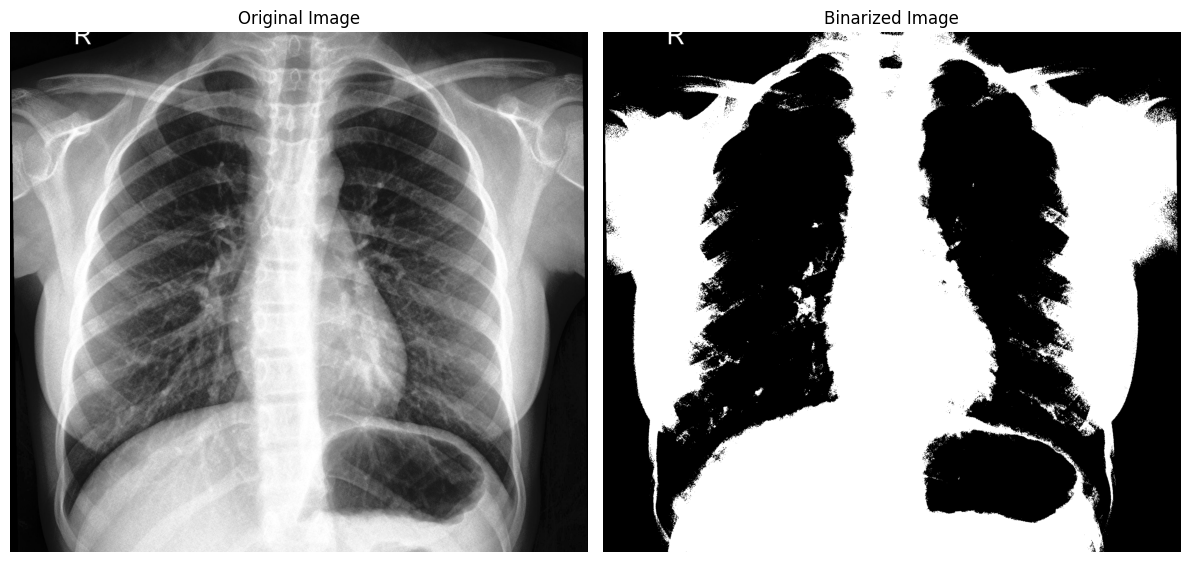

In [86]:
def binarize_image(image, threshold=128):
    if isinstance(image, Image.Image):
        if image.mode != "L":
            image = image.convert("L") # ensure grayscale
        image = np.array(image)
    _, binarized_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return binarized_image

original_image_np = np.array(original_image)

# Apply binarization
binarized_image = binarize_image(original_image)

# Plot side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image_np, cmap='gray' if original_image.mode == "L" else None)
plt.title("Original Image")
plt.axis('off')

# Binarized image
plt.subplot(1, 2, 2)
plt.imshow(binarized_image, cmap='gray')
plt.title("Binarized Image")
plt.axis('off')

plt.tight_layout()
plt.show()

## 7. Normalizácia

In [87]:
def normalize_image(image):
    if isinstance(image, Image.Image):
        image = np.array(image)
    normalized_image = image / 255.0
    return normalized_image

# Example usage
normalized_image = normalize_image(binarized_image)
print(normalized_image)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


toto boli samostatne metody, my ale chceme tieto metody spolocne vyuzit takze si vytvorime jednoduchu pipe

In [88]:
def preprocess_image_resize_first(image_path):
    image = Image.open(image_path)
    image = resize_image(image)
    image = reduce_noise(image)
    image = sharpen_image(image)
    image = augment_image(image)
    image = binarize_image(image)
    # image = normalize_image(image)
    return image

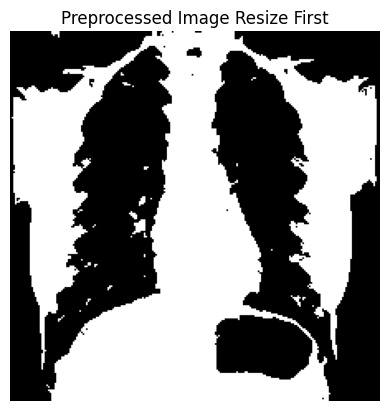

In [89]:
# Example
image_path = "Covid_preprocess/train/Normal/020.jpg"
preprocessed_image = preprocess_image_resize_first(image_path)

# Display preprocessed image
plt.imshow(preprocessed_image, cmap='gray')
plt.title("Preprocessed Image Resize First")
plt.axis('off')
plt.show()


In [90]:
def preprocess_image_resize_trd(image_path):
    image = Image.open(image_path)
    image = reduce_noise(np.array(image))
    image = sharpen_image(image)
    image = resize_image(Image.fromarray(image))
    image = augment_image(image)
    # image = binarize_image(image)
    image = normalize_image(image)
    return image

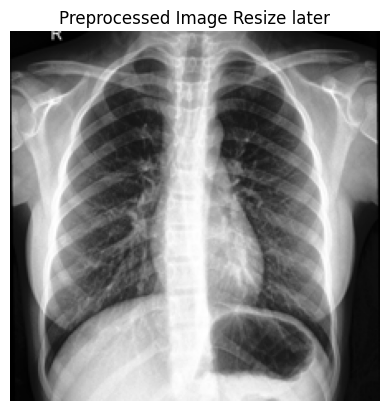

In [91]:
# Example
image_path = "Covid_preprocess/train/Normal/020.jpg"
preprocessed_image = preprocess_image_resize_trd(image_path)

# Display preprocessed image
plt.imshow(preprocessed_image, cmap='gray')
plt.title("Preprocessed Image Resize later")
plt.axis('off')
plt.show()

## Zaver Preprocessingu
V zavere preprocessingu mozme vidiet ze pipeline v ktorej resizujeme snimky neskor zachovavaju viac detailov a nie su skoro takmer viac casovo narocnejsie na vykonanie preto pouzijeme na preprocessing vsetkych trenovacich aj testovacich dat tuto pipeline

In [92]:
# nasledujuci kod sa bude vyuzivat na dynamicke priame preprocesovanie dat pomocou 
# pipeline bez ukladania preprocesovanych dat na disk ale iba v premennych

def create_dataset(data_dir, label_map):
    X = []
    y = []

    # Iterate through class subdirectories
    for class_name, label in label_map.items():
        class_dir = os.path.join(data_dir, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            try:
                # Preprocess image
                preprocessed_image = preprocess_image_resize_trd(image_path)
                X.append(preprocessed_image)
                y.append(label)
            except Exception as e:
                print(f"Error processing {image_name}: {e}")

    # Convert lists to NumPy arrays
    X = np.array(X)
    y = np.array(y)
    return X, y

In [93]:
# Usage on ALL Training data
train_data_dir = "Covid_preprocess/train"
label_map = {"Covid": 0, "Normal": 1, "Viral Pneumonia": 2}

X_train, y_train = create_dataset(train_data_dir, label_map)

In [94]:
# Usage on ALL Test data
test_data_dir = "Covid_preprocess/test"

X_test, y_test = create_dataset(test_data_dir, label_map)

Este overime aku strukturu maju ulozene data predtym ako to budeme pasovat do modelu

In [ ]:
X_train.shape
# (312, 224, 224) -> mame 312 snimkov v rozmeroch 224x224
# nemame 4. dimenziu kde by normalne boli RGB kanaly, 
# pretoze po preprocessingu mame vsetky snimky v grayscale

(312, 224, 224)

In [ ]:
X_train[0] # mozme vidiet ze data su normalizovane medzi (0 a 1)

array([[0.        , 0.00392157, 0.00392157, ..., 0.02745098, 0.02745098,
        0.03137255],
       [0.00392157, 0.01176471, 0.        , ..., 0.02352941, 0.02352941,
        0.02745098],
       [0.01176471, 0.01176471, 0.        , ..., 0.01960784, 0.01960784,
        0.02352941],
       ...,
       [0.02745098, 0.01568627, 0.01176471, ..., 0.01960784, 0.02745098,
        0.03137255],
       [0.02745098, 0.02352941, 0.01568627, ..., 0.01960784, 0.02745098,
        0.03921569],
       [0.03137255, 0.02745098, 0.02745098, ..., 0.02745098, 0.03529412,
        0.05098039]])

In [97]:
y_train.shape
# (312,) -> mame 312 zakodovanych lables
# label_map = {"Covid": 0, "Normal": 1, "Viral Pneumonia": 2}
# hodnota v arrayi y_train zodpoveda labelu ktory je namapovany

(312,)

In [98]:
label_map_reverse = {0:"Covid", 1:"Normal", 2:"Viral Pneumonia"}

In [99]:
# definujeme funkciu ktora zobrazi preprocesnuty image aj s nazvom

def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index], cmap="gray")
    plt.xlabel(label_map_reverse[y[index]])

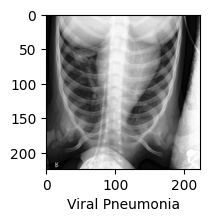

In [100]:
plot_sample(X_train, y_train, 240)

- (B-1b)	Zdôvodnite výber ML/DL metód vzhľadom na Vami vybraný dataset pre 4.2

In [101]:
# TODO

## 4.2. Modeling and evaluation (5b)


- (A-4b)	Modeluje Vami tie vybrané charakteristiky pomocou vhodných ML/DL	metód. Výsledok modelovania je najlepší model.


In [105]:
# zacneme basic jednoduchym modelom
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam

ann = models.Sequential([
    layers.Flatten(input_shape=(224, 224, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4152 - loss: 3.8341
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3450 - loss: 1.2288
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5747 - loss: 0.9501
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6913 - loss: 0.8181
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7646 - loss: 0.6518


In [106]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(elem) for elem in y_pred]

print("classific report: \n", classification_report(y_test, y_pred_classes))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
classific report: 
               precision    recall  f1-score   support

           0       0.45      1.00      0.62        26
           1       0.14      0.05      0.07        20
           2       1.00      0.05      0.10        20

    accuracy                           0.42        66
   macro avg       0.53      0.37      0.26        66
weighted avg       0.52      0.42      0.30        66



In [ ]:
cnn = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 1)),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

c:\Users\Asus\iau_project\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 340ms/step - accuracy: 0.4004 - loss: 2.5187
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 412ms/step - accuracy: 0.7394 - loss: 0.7632
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 315ms/step - accuracy: 0.8580 - loss: 0.4146
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 306ms/step - accuracy: 0.9375 - loss: 0.1886
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 314ms/step - accuracy: 0.9595 - loss: 0.1018
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 298ms/step - accuracy: 0.9854 - loss: 0.0870
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 300ms/step - accuracy: 0.9957 - loss: 0.0346
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 297ms/step - accuracy: 1.0000 - loss: 0.0176
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 296ms/step - accuracy: 1.0000 - loss: 0.0138
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 298ms/step - accuracy: 1.0000 - loss: 0.0051


In [116]:
cnn.evaluate(X_train, y_train)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 1.0000 - loss: 0.0021


[0.003898463910445571, 1.0]

In [ ]:

cnn.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9580 - loss: 0.0970


[0.1258060187101364, 0.939393937587738]

- (B-1b)	Zhodnotíte Váš prístup a získaný výsledok	